# 05 Branching Process

Branching process is a special case of Markov chain. 

Denote $\xi_{ij}$ to be the number of offsprings from the $j$-th member of the $i$-th generation.

Let $Z_n = \sum_{j=1}^{Z_{n-1}} \xi_{n-1,j}$ be the total number of offsprings in the $n$-th generation. Define $Z_0 = 1$. Then $Z_1 = \xi_{01}$ is a single random variable.

Now we suppose $\xi_{ij}$ are i.i.d. from a distribution $\xi$. Then $Z_1,Z_2,\dotsc$ is called a branching process. Clearly it is a Markov chain because it is memoryless.

## Generating Function

Let $G(s) = \mathbb{E}[s^\xi]$ be the generating function of $\xi$. Explicitly, $G(s) = \sum_{k=0}^\infty s^k \mathbb{P}(\xi = k)$.

**Be careful!** Generating function is not moment generating function! Actually, $G(s) = \psi(\ln s)$.


### Recurrsion

**Theorem** The generating function of $Z_n\ (n\geqslant 2)$ has recurrsion $G_n(s) = G_{n-1}(G(s))$.

**Proof** 


$$G_n(s)=\mathbb E[s^{Z_n}]=\mathbb E[s^{\sum_{j=1}^{Z_{n-1}} \xi_{n-1,j}}]= \mathbb E_{Z_{n-1}}\left\{\psi (s)^{Z_{n-1}}\right\}=\sum_{k=0}^\infty \psi(s)^k \mathbb{P}(Z_{n-1} = k)= G_{n-1}(G(s)).$$

<br>

**Theorem** Suppose $\mathbb{E}[\xi] = \mu < \infty$. Then $\mathbb E(Z_n) = \mu^n$.

**Proof**

$$\mathbb E(Z_n) = G_n'(1) = G_{n-1}'(G(1))G'(1) = \mu G_{n-1}'(1) = \mu\mathbb E(Z_{n-1}). $$

Then $\mathbb E(Z_n) = \mu^n$ by induction.

## Extinction

Define $\tau= \lim_{n\rightarrow\infty} \mathbb P(Z_n = 0)$ be the probability of extinction. 

Note that $\mathbb P(Z_n=0)$ must be non-decreasing because $Z_n=0\Rightarrow Z_{n+1}=0$. Thus the sequence is convergent and $\tau$ must exist and $0\leqslant \tau\leqslant 1$.

**Theorem** Denote $p_0 = \mathbb P(\xi = 0)$. Then $\tau$ is given by the below argument.

1. When $\mu\leqslant 1$, $\tau = 1$.
2. When $\mu>1$ and $0<p_0<1$, then $\tau$ is the unique root of $G(\tau)=\tau$ in $(0,1)$.
3. When $\mu>1$ and $p_0=0$, then $\tau=0$.
4. When $\mu>1$ and $p_0=1$, then $\tau=1$.

**Proof**

For the first, by Markov inequality, 

$$\mathbb P(Z_n\neq 0)= \mathbb P(Z_n\geqslant 1)\leqslant \mathbb E(Z_n) = \mu^n\rightarrow 0.$$

<br>

For the second, note that $\tau = \lim \mathbb P(Z_n=0) = \lim G_n(0)$, then it has equation $G_n(\tau)=\tau$. Now we will show the existence and the uniqueness of the root.

Let $h(s) = G(s)-s$. Then $h''(s) \geqslant 0$, $h'(1)=\mu-1>0$ and $h'(0)=\mathbb P(\xi=1)-1<0$. Thus $h(s)$ first decreases and then increases over $(0,1)$. But $h(1)=0$ and $h(0)=p_0>0$. Thus there is a unique root in $(0,1)$.

<br>

For the third, one is easy to show $G_n(0)=0$ by induction. For the fourth, the extinction immediately happens.

tau = 0.5


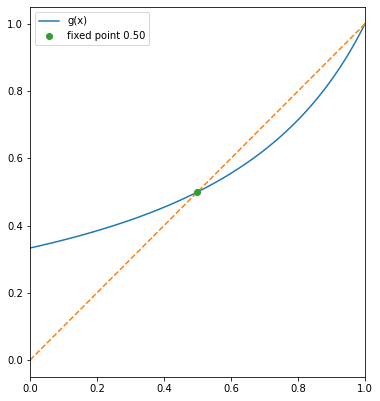

In [29]:
from matplotlib import pyplot as plt
import numpy as np

def solve_fixed_point(g, x = .5):
    # Solve the fixed point equation x = g(x) by iterating
    x1, x = x, x + 1
    while abs(x1-x) > 1e-8:
        x1, x = g(x1), x1
    return x1

g = lambda s: 1/(3-2*s)
tau = solve_fixed_point(g)
print('tau =', tau)

xaxis = np.linspace(0, 1, 100)
plt.figure(figsize = (6, 6.8))
plt.plot(xaxis, g(xaxis), label = 'g(x)')
plt.plot(xaxis, xaxis, linestyle = '--')
plt.plot(tau, tau, 'o', label = 'fixed point %.2f'%tau)
[plt.legend(), plt.axis('equal'), plt.xlim(0, 1)]
plt.show()